## Feature Selection & Encoding - Tree Approach to Dimensionality Reduction

In [1]:
# Import the libraries needed

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [2]:
# ******************************************************
# TWO CHANGES NEED TO BE MADE TO THIS NOTEBOOK IF 'RACE'
# ATTRIBUTE IS REMOVED
# ******************************************************

In [3]:
# Read in the dataset passed from the last module

data = pd.read_csv('Mod_2_data_to_pass.csv')

In [4]:
# Checking data types before proceeding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99343 entries, 0 to 99342
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    99343 non-null  object
 1   age                       99343 non-null  object
 2   admission_type_id         99343 non-null  object
 3   discharge_disposition_id  99343 non-null  int64 
 4   time_in_hospital          99343 non-null  int64 
 5   num_lab_procedures        99343 non-null  int64 
 6   num_procedures            99343 non-null  int64 
 7   num_medications           99343 non-null  int64 
 8   number_outpatient         99343 non-null  int64 
 9   number_emergency          99343 non-null  int64 
 10  number_inpatient          99343 non-null  int64 
 11  diag_1                    99323 non-null  object
 12  diag_2                    98987 non-null  object
 13  diag_3                    97924 non-null  object
 14  number_diagnoses      

In [5]:
# Change data types to categories

cat_list = ['gender', 'age', 'admission_type_id', 'discharge_disposition_id',
            'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'change',
           'diabetesMed', 'readmitted', 'Meglitinides', 'Thiazolidinediones',
           'Sulfonylureas', 'AG_Inhibitors', 'Metformin', 'Insulin', 'Admission_Source']

#cat_list.append('race')

for item in cat_list:
    data[item] = data[item].astype('category')



In [6]:
# Confirming data types have been changed to categorical
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99343 entries, 0 to 99342
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   gender                    99343 non-null  category
 1   age                       99343 non-null  category
 2   admission_type_id         99343 non-null  category
 3   discharge_disposition_id  99343 non-null  category
 4   time_in_hospital          99343 non-null  int64   
 5   num_lab_procedures        99343 non-null  int64   
 6   num_procedures            99343 non-null  int64   
 7   num_medications           99343 non-null  int64   
 8   number_outpatient         99343 non-null  int64   
 9   number_emergency          99343 non-null  int64   
 10  number_inpatient          99343 non-null  int64   
 11  diag_1                    99323 non-null  category
 12  diag_2                    98987 non-null  category
 13  diag_3                    97924 non-null  cate

## One Hot Encoding

In [7]:
# ONE HOT ENCODING IN A LOOP
# DRUGS NOT INCLUDED
# USE ONE-HOT ENCODING TO BINARIZE CATEGORICAL ATTRIBUTES


# Create one hot encoder (start the tool)
# ?? Don't understand what 'sparse_output = False' does
encoder = OneHotEncoder(sparse_output = False, dtype = np.int)

# Create a new dataframe to store the one-hot encoded data
encoded_dataframes = []

# Create a list of all the categorical columns to be one-hot encoded
cat_columns = ['gender', 'age', 'admission_type_id',
               'discharge_disposition_id', 'max_glu_serum', 'A1Cresult',
               'Meglitinides', 'Thiazolidinediones', 'Sulfonylureas',
               'AG_Inhibitors', 'Metformin', 'Insulin', 'change',
               'diabetesMed', 'Admission_Source']

#cat_columns.append('race')

for column in cat_columns:
    # Get data to be encoded from original dataset
    column_data = data[[column]]

    # Use the encoder
    encoded_data = encoder.fit_transform(column_data)

    # Create a temporary dataframe to hold encoded data
    temp_encoded_data = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out([column]))

    # Add the encoded dataframe to the list created above
    encoded_dataframes.append(temp_encoded_data)

# Concat all the encoded dataframes in the temp_encoded_data list
completed_dataframe = pd.concat(encoded_dataframes, axis = 1)

# Remove the original columns from test3
data_copy = data.copy()
data_copy = data_copy.drop(cat_columns, axis = 1)


# Put the remaining original data columns together with the encoded dataframe
data = pd.concat([data_copy, completed_dataframe], axis=1)

C:\Users\Ingli\AppData\Local\Temp\ipykernel_15816\283034030.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  encoder = OneHotEncoder(sparse_output = False, dtype = np.int)


In [8]:
# Confirming One Hot Encoding was done correctly and verifying new number of attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99343 entries, 0 to 99342
Data columns (total 81 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   time_in_hospital                 99343 non-null  int64   
 1   num_lab_procedures               99343 non-null  int64   
 2   num_procedures                   99343 non-null  int64   
 3   num_medications                  99343 non-null  int64   
 4   number_outpatient                99343 non-null  int64   
 5   number_emergency                 99343 non-null  int64   
 6   number_inpatient                 99343 non-null  int64   
 7   diag_1                           99323 non-null  category
 8   diag_2                           98987 non-null  category
 9   diag_3                           97924 non-null  category
 10  number_diagnoses                 99343 non-null  int64   
 11  readmitted                       99343 non-null  category
 12  gend

## Split Data into Train and Test Sets

In [9]:
# Select all the features except the target variable
X = data.drop('readmitted', axis = 1)
#print(X.info())

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, data['readmitted'], test_size = 0.2, random_state=403)

In [10]:
# Confirming the size of the training and test sets

print('X_train size\n', X_train.shape)

print('\nX_test size\n', X_test.shape)

X_train size
 (79474, 80)

X_test size
 (19869, 80)


## Feature Scaling of Quantitative Attributes

In [11]:
# Create a list of the quantitative attributes

quantList = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
             'num_medications', 'number_outpatient', 'number_emergency',
             'number_inpatient', 'number_diagnoses']

# Instantiate the StandardScaler tool
scaler = StandardScaler()

# Scaling the numerical attributes listed in quantList in the training
# set using the StandardScaler

X_train[quantList] = scaler.fit_transform(X_train[quantList])

In [12]:
# Confirming the data has been scaled in the training set
X_train

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,...,Insulin_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,Admission_Source_Emerg_Dept,Admission_Source_Missing,Admission_Source_Other,Admission_Source_Referral,Admission_Source_Transfer
38179,-1.137970,-0.609203,2.743051,-0.892059,-0.362295,-0.312787,-0.538492,414,250.01,414,...,0,1,0,0,1,0,0,0,1,0
96739,-1.137970,-1.680635,1.567417,-0.503726,0.734082,1.589016,-0.538492,379,362,366,...,0,1,0,0,1,1,0,0,0,0
70345,-0.801986,-2.088799,-0.196033,0.014051,-0.362295,-0.312787,0.341344,414,413,403,...,0,0,1,1,0,1,0,0,0,0
217,-1.137970,0.564269,2.155234,-1.539281,-0.362295,-0.312787,-0.538492,414,250.6,250.51,...,1,0,1,0,1,0,0,0,1,0
11101,-0.801986,0.003043,0.391784,-0.374282,-0.362295,-0.312787,-0.538492,574,250,401,...,1,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,2.221878,0.819372,-0.783849,-0.374282,-0.362295,-0.312787,0.341344,486,250,530,...,0,0,1,1,0,1,0,0,0,0
38736,0.877939,0.054064,2.155234,2.602938,-0.362295,-0.312787,0.341344,721,496,414,...,0,1,0,0,1,1,0,0,0,0
41916,-0.801986,-2.139820,-0.783849,-0.762615,-0.362295,-0.312787,1.221179,486,496,428,...,0,1,0,0,1,1,0,0,0,0
31351,-0.466001,0.513248,-0.783849,0.531829,-0.362295,-0.312787,1.221179,536,428,250.6,...,1,1,0,0,1,1,0,0,0,0


## SMOTE

In [13]:
# Three attributes contain NaN data so they need to be removed from the dataset
# Remove diag_1, diag_2 and diag_3 due to NaN
X_train = X_train.drop('diag_1', axis = 1)
X_train = X_train.drop('diag_2', axis = 1)
X_train = X_train.drop('diag_3', axis = 1)

In [14]:
# Using SMOTE (Synthetic Minority Over-sampling TEchnique) to address the
# class imbalance problem.
# SMOTE generates synthetic rows for the minority class in the training set
smote = SMOTE()
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [15]:
# Checking the size of the y training dataset before SMOTE was applied
Y_train.info()

<class 'pandas.core.series.Series'>
Index: 79474 entries, 38179 to 2226
Series name: readmitted
Non-Null Count  Dtype   
--------------  -----   
79474 non-null  category
dtypes: category(1)
memory usage: 698.6 KB


In [16]:
# Checking the size of the y training dataset after SMOTE was applied
Y_train_resampled.info()

<class 'pandas.core.series.Series'>
RangeIndex: 126204 entries, 0 to 126203
Series name: readmitted
Non-Null Count   Dtype   
--------------   -----   
126204 non-null  category
dtypes: category(1)
memory usage: 123.5 KB


## Variance Threshold

In [17]:
# Turn the VarianceThreshold tool on & specify the minimum
# variance threshold
# The lower the threshold, the more features will be
# considered for removal
selector = VarianceThreshold(threshold=0.1)

# Create high variance feature matrix
# Fit and transform the data
Xnew = selector.fit_transform(X_train_resampled)

# Get the indices of the features that were selected
selected_features_indices = selector.get_support(indices=True)

# Create a list of the attribute names
feature_names = X_train_resampled.columns

# Get the feature names with low variance
low_variance_features = [feature_names[i] for i in range(len(feature_names)) if i not in selected_features_indices]

# Print the low variance features
display("Low variance features to be dropped:", low_variance_features)
print("Number of features to be dropped: ", len(low_variance_features))

'Low variance features to be dropped:'

['gender_Missing',
 'age_[0-10)',
 'age_[10-20)',
 'age_[20-30)',
 'age_[30-40)',
 'age_[40-50)',
 'age_[90-100)',
 'admission_type_id_Missing',
 'admission_type_id_Trauma Centre',
 'discharge_disposition_id_2',
 'discharge_disposition_id_4',
 'discharge_disposition_id_5',
 'discharge_disposition_id_7',
 'discharge_disposition_id_8',
 'discharge_disposition_id_9',
 'discharge_disposition_id_12',
 'discharge_disposition_id_15',
 'discharge_disposition_id_16',
 'discharge_disposition_id_17',
 'discharge_disposition_id_22',
 'discharge_disposition_id_23',
 'discharge_disposition_id_24',
 'discharge_disposition_id_27',
 'discharge_disposition_id_28',
 'discharge_disposition_id_999',
 'max_glu_serum_>200',
 'max_glu_serum_>300',
 'max_glu_serum_Norm',
 'max_glu_serum_nan',
 'A1Cresult_>7',
 'A1Cresult_>8',
 'A1Cresult_Norm',
 'Meglitinides_Adjusted',
 'Meglitinides_No',
 'Meglitinides_Steady',
 'Thiazolidinediones_No',
 'Thiazolidinediones_Steady',
 'Sulfonylureas_No',
 'Sulfonylureas_Stead

Number of features to be dropped:  47


In [18]:
# Make changes to X_train_resampled dataset
# Drop low variance features from dataset
X_train_LowVariance = X_train_resampled.drop(low_variance_features, axis=1)

In [19]:
# Verifying changes were made correctly
print('X_train before changes: ', X_train_resampled.shape)
print('X_train after changes: ', X_train_LowVariance.shape)

X_train before changes:  (126204, 77)
X_train after changes:  (126204, 30)


In [20]:
# *********** PROBLEM WITH DATASET SIZE - ALSO, SHOULD I EVEN BE DOING THIS??? ***************
# Make changes to X_test dataset
X_test_LowVariance = X_test.drop(low_variance_features, axis = 1)
print(X_test_LowVariance.shape)

(19869, 33)


In [21]:
# There is a problem with the test dataset having 3 more columns than the training set
# This cell is exploring why there is a discrepancy
# It turns out that the diag_1, diag_2 and diag_3 attributes were not eliminated in the
# feature selection process.

X_test_LowVariance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19869 entries, 28564 to 6782
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   time_in_hospital             19869 non-null  int64   
 1   num_lab_procedures           19869 non-null  int64   
 2   num_procedures               19869 non-null  int64   
 3   num_medications              19869 non-null  int64   
 4   number_outpatient            19869 non-null  int64   
 5   number_emergency             19869 non-null  int64   
 6   number_inpatient             19869 non-null  int64   
 7   diag_1                       19866 non-null  category
 8   diag_2                       19796 non-null  category
 9   diag_3                       19597 non-null  category
 10  number_diagnoses             19869 non-null  int64   
 11  gender_Female                19869 non-null  int32   
 12  gender_Male                  19869 non-null  int32   
 13  age

In [22]:
# Removing diag_1, diag_2, diag_3 from the test dataset

X_test_LowVariance = X_test_LowVariance.drop('diag_1', axis = 1)
X_test_LowVariance = X_test_LowVariance.drop('diag_2', axis = 1)
X_test_LowVariance = X_test_LowVariance.drop('diag_3', axis = 1)

# Verifying change was made correctly
X_test_LowVariance.shape

(19869, 30)

<function matplotlib.pyplot.show(close=None, block=None)>

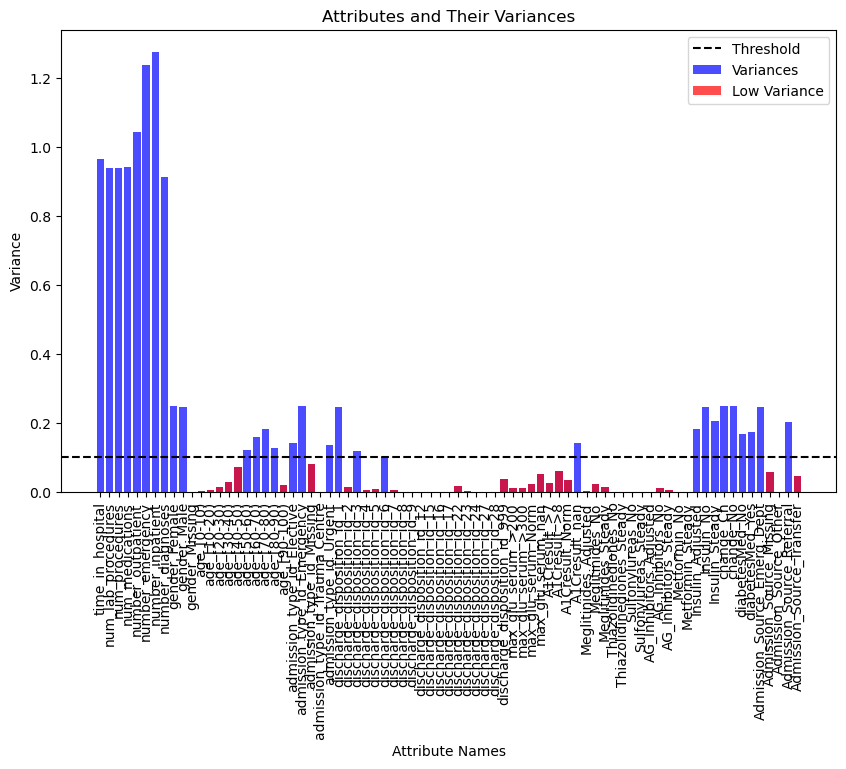

In [23]:
# Plot the variances of all of the attributes in blue
plt.figure(figsize = (10,6))
plt.bar(range(len(feature_names)), selector.variances_, color = 'blue', alpha = 0.7, label = 'Variances')

# Show the low variance features in red
low_variance_indices = [i for i in range(len(feature_names)) if i not in selected_features_indices]
plt.bar(low_variance_indices, selector.variances_[low_variance_indices], color = 'red', alpha = 0.7, label = 'Low Variance')

plt.axhline(y=0.1, color = 'black', linestyle = '--', label = 'Threshold')
plt.xticks(range(len(feature_names)), feature_names, rotation = 'vertical')
plt.xlabel('Attribute Names')
plt.ylabel('Variance')
plt.title('Attributes and Their Variances')
plt.legend()
plt.show

## Exporting Data to Next Step

In [24]:
# Verifying that the datasets have the same number of rows and attributes before exporting
print('X_train: ', X_train_LowVariance.shape)
print('Y_train: ', Y_train_resampled.shape)
print('X_test: ', X_test_LowVariance.shape)
print('Y_test: ', Y_test.shape)

X_train:  (126204, 30)
Y_train:  (126204,)
X_test:  (19869, 30)
Y_test:  (19869,)


In [25]:
# Export data to Model Building & Evaluation Notebook

# If using Feature Importance from a Tree-Based Model, use this cell
X_train_LowVariance.to_csv('Mod_3_X_train_LVar.csv', index = False)
X_test_LowVariance.to_csv('Mod_3_X_test_LVar.csv', index = False)
Y_train_resampled.to_csv('Mod_3_Y_LVar.csv', index = False)
Y_test.to_csv('Mod_3_Y_test_LVar.csv', index = False)